## Forecasting of house prices
In this assignment, i'm to predict house price return and since i will be using continues values, i'm going to use linear regression technique

### Problem 1
**Selection of features for practice**

In [1]:
# problem 1
import pandas as pd

# loading the downloaded dataset
pd_train = pd.read_csv('train.csv')
target_variable = pd_train[["GrLivArea","YearBuilt", "SalePrice"]]

# Visualizing few rows and columns of our dataset after selecting key variables to work with
target_variable.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


We have 3 columns to be used, **GrLivArea**, **YearBuilt** and **SalePrice**

### Problem 2
**Estimation and evaluation by linear regression**

In [2]:
# problem 2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = target_variable.loc[:, ["GrLivArea","YearBuilt"]]
y = target_variable["SalePrice"]

# splitting the data into training and testing data using train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

reg = LinearRegression().fit(X_train_trans, y_train)
reg_pred = reg.predict(X_test_trans)

from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y_true=y_test, y_pred=reg_pred))

MSE: 2314465092.7320137


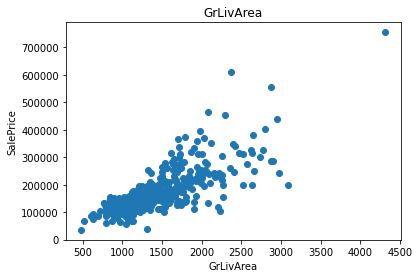

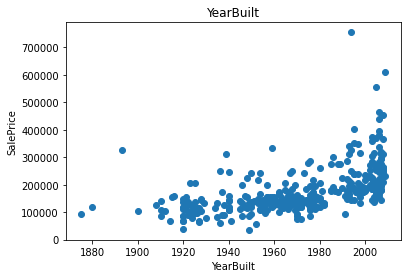

In [3]:
import matplotlib.pyplot as plt

# visualization
# for GrLivArea and saleprice
plt.scatter(X_test.loc[:, 'GrLivArea'], y_test)
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# for GrLivArea and saleprice
plt.scatter(X_test.loc[:, 'YearBuilt'], y_test)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

- The **MSE** was calculated by comparing the y_test dataset and the predicted data(using linear regression technique) and the result was **MSE: 2314465092.732013**
- the definition of **MSE** will be given downbelow

### Problem 3
**Comparison of methods**

Linear Regression
MSE: 2314465092.7320137


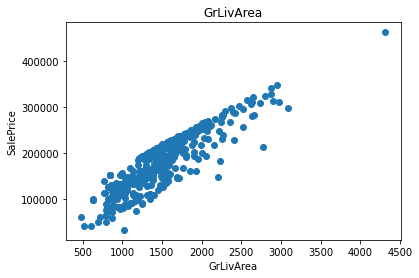

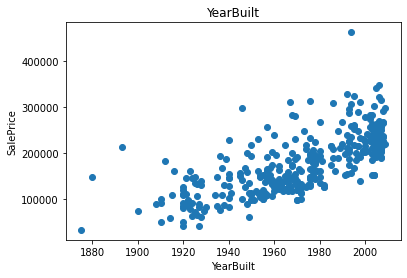

-----------------------------------------
SVM
MSE: 7169223057.829623


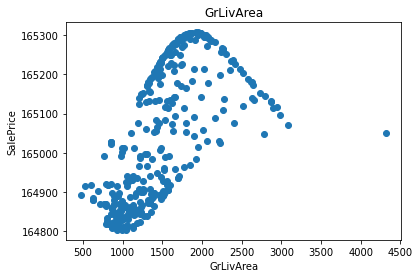

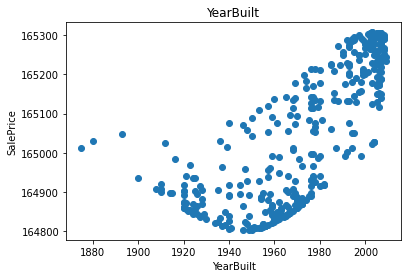

-----------------------------------------
Decision tree
MSE: 2276521219.835921


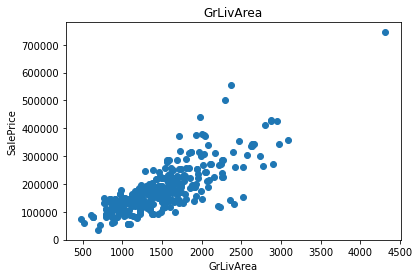

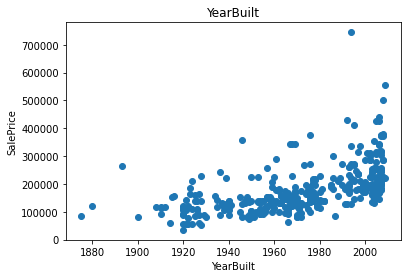

-----------------------------------------
Random Forest
MSE: 1666107290.9165735


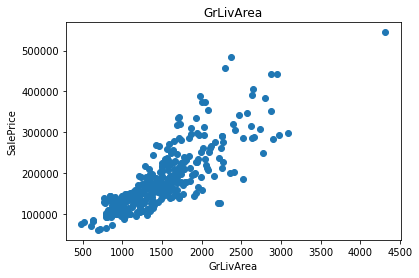

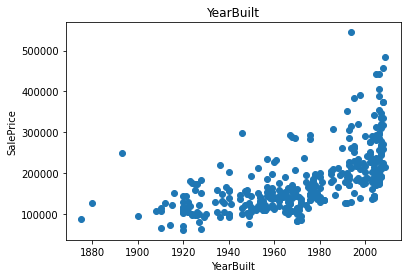

-----------------------------------------


In [5]:
# problem 3

mSE_results = []
model_names = []

def display_outputs(title,y_prediction):
    
    # calculating the MSE
    mSE = mean_squared_error(y_true=y_test, y_pred=y_prediction)
    
    # adding the results into a list
    mSE_results.append(mSE)
    model_names.append(title)

    # Displaying the results
    print(title)
    print("MSE:", mSE)
    
    # visualization
    # for GrLivArea and saleprice
    plt.scatter(X_test.loc[:, 'GrLivArea'], y_prediction)
    plt.title('GrLivArea')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.show()

    # for GrLivArea and saleprice
    plt.scatter(X_test.loc[:, 'YearBuilt'], y_prediction)
    plt.title('YearBuilt')
    plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice')
    plt.show()
    
    print("-----------------------------------------")

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# linear regression
reg = LinearRegression().fit(X_train_trans, y_train)

# prediction
reg_pred = reg.predict(X_test_trans)

# passing data into the outputing function
display_outputs('Linear Regression', reg_pred)

# SVM
clf = make_pipeline(StandardScaler(), SVR(gamma='auto'))

# fitting
clf.fit(X_train_trans, y_train)

# prediction
clf_pred = clf.predict(X_test_trans)

# passing data into the outputing function
display_outputs('SVM', clf_pred)

# Decision tree
dTR = DecisionTreeRegressor(random_state=0)

# fitting
dTR.fit(X_train_trans, y_train)

# prediction
dTR_pred = dTR.predict(X_test_trans)

# passing data into the outputing function
display_outputs('Decision tree', dTR_pred)

# Random Forest
rFC = RandomForestRegressor(random_state=0)

# fitting
rFC.fit(X_train_trans, y_train)

# prediction
rFC_pred = rFC.predict(X_test_trans)

# passing data into the outputing function
display_outputs('Random Forest', rFC_pred)


In [6]:
# putting the results in a table
pd.DataFrame(mSE_results, index=model_names, columns=['MSE'])

,MSE
Linear Regression,2.314465e+09
SVM,7.169223e+09
Decision tree,2.276521e+09
Random Forest,1.666107e+09


**Mean Squared Error(MSE)** is a measure of how close a fitted line is to data points.

**how to look at the figures**
The smaller the **Mean Squared Error(MSE)**, the closer the fit is to the data

After splitting the dataset into train and test dataset and getting the predicted data from various technique, i calculated **MSE** after each technique.

And according to the results, the best technique is **Linear Regression** because it's result is closer to 0 than the output of other methods.

### Problem 4
**Learning using other features**

In [7]:
# problem 4
pd_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# adding other features to the variable to be used
target_variable = pd_train[["GrLivArea","YearBuilt", "SalePrice", "LotArea", "YrSold"]]

# dividing them into different variables
X = target_variable.loc[:, ["GrLivArea","YearBuilt", "LotArea", "YrSold"]]
y = target_variable["SalePrice"]

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# standardizing the data
scaler = StandardScaler()

# fitting
scaler.fit(X_train)

# transforming
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

# fitting
reg = LinearRegression().fit(X_train_trans, y_train)

# prediction
reg_pred = reg.predict(X_test_trans)

# calculating and displaying the MSE
print("MSE:", mean_squared_error(y_true=y_test, y_pred=reg_pred))

MSE: 2272782613.19264


**Conclusion**
- As a conclusion it looks like as the feature increases the **MSE** also increase, so it is important to select important and few feature to work with to get accurate data